In [1]:
import os
import glob

import tables as tb
import numpy  as np
import pandas as pd

from collections import defaultdict

import gres.database.load_db as db
from   gres.cities.components import calibrate_pmts, calibrate_pmts_wf_data

import invisible_cities.io.pmaps_io as pmapio
import invisible_cities.io.dst_io  as dstio
import invisible_cities.io.mcinfo_io as mcio
import gres.database.load_db as db
import invisible_cities.io.run_and_event_io as rio

import invisible_cities.core.core_functions as coref

In [2]:
import matplotlib        as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib notebook
%matplotlib inline
### Useful parameters for plots
mpl.rcParams["figure.figsize"]          = 12,10
mpl.rcParams["font.size"]               = 20
mpl.rcParams["figure.max_open_warning"] = 100
mpl.rcParams["font.size"]               = 20
mpl.rcParams["font.weight"]             ='normal'
mpl.rcParams["axes.labelweight"] = "normal"
mpl.rcParams['axes.facecolor'] = 'w'
mpl.rcParams['figure.facecolor'] = 'w';

In [18]:
run     = 1200
datatypes = ['22Na', '83mKr', '133Ba', 'NoSource', '57Co', '241Am', '55Fe']
inpath  = f'/home/ander/Work/GaP/real_data/{datatypes[5]}/R{run}/'
inpath  = f'/home/ander/Work/GaP/real_data/Test_Scintillator/R{run}/'

In [19]:
ifile   = 0
wf_file = glob.glob(inpath+f'raw/Run_{run}_file_{ifile}_raw.h5')[0]
pm_file = glob.glob(inpath+f'octavia/DST_run_{run}_pmaps.h5')[0]

In [20]:
data_1_s1 = pd.read_hdf(pm_file, 'S1')
data_1_s2 = pd.read_hdf(pm_file, 'WVF')

data_1_s1 = data_1_s1[data_1_s1['file'] == os.path.basename(wf_file)]
data_1_s2 = data_1_s2[data_1_s2['file'] == os.path.basename(wf_file)]

data_1_s1['r'] = np.sqrt(data_1_s1.x**2 + data_1_s1.y**2)
data_1_s2['r'] = np.sqrt(data_1_s2.x**2 + data_1_s2.y**2)

weights_1_s1 = np.ones(len(data_1_s1))
weights_1_s2 = np.ones(len(data_1_s2))

493.1


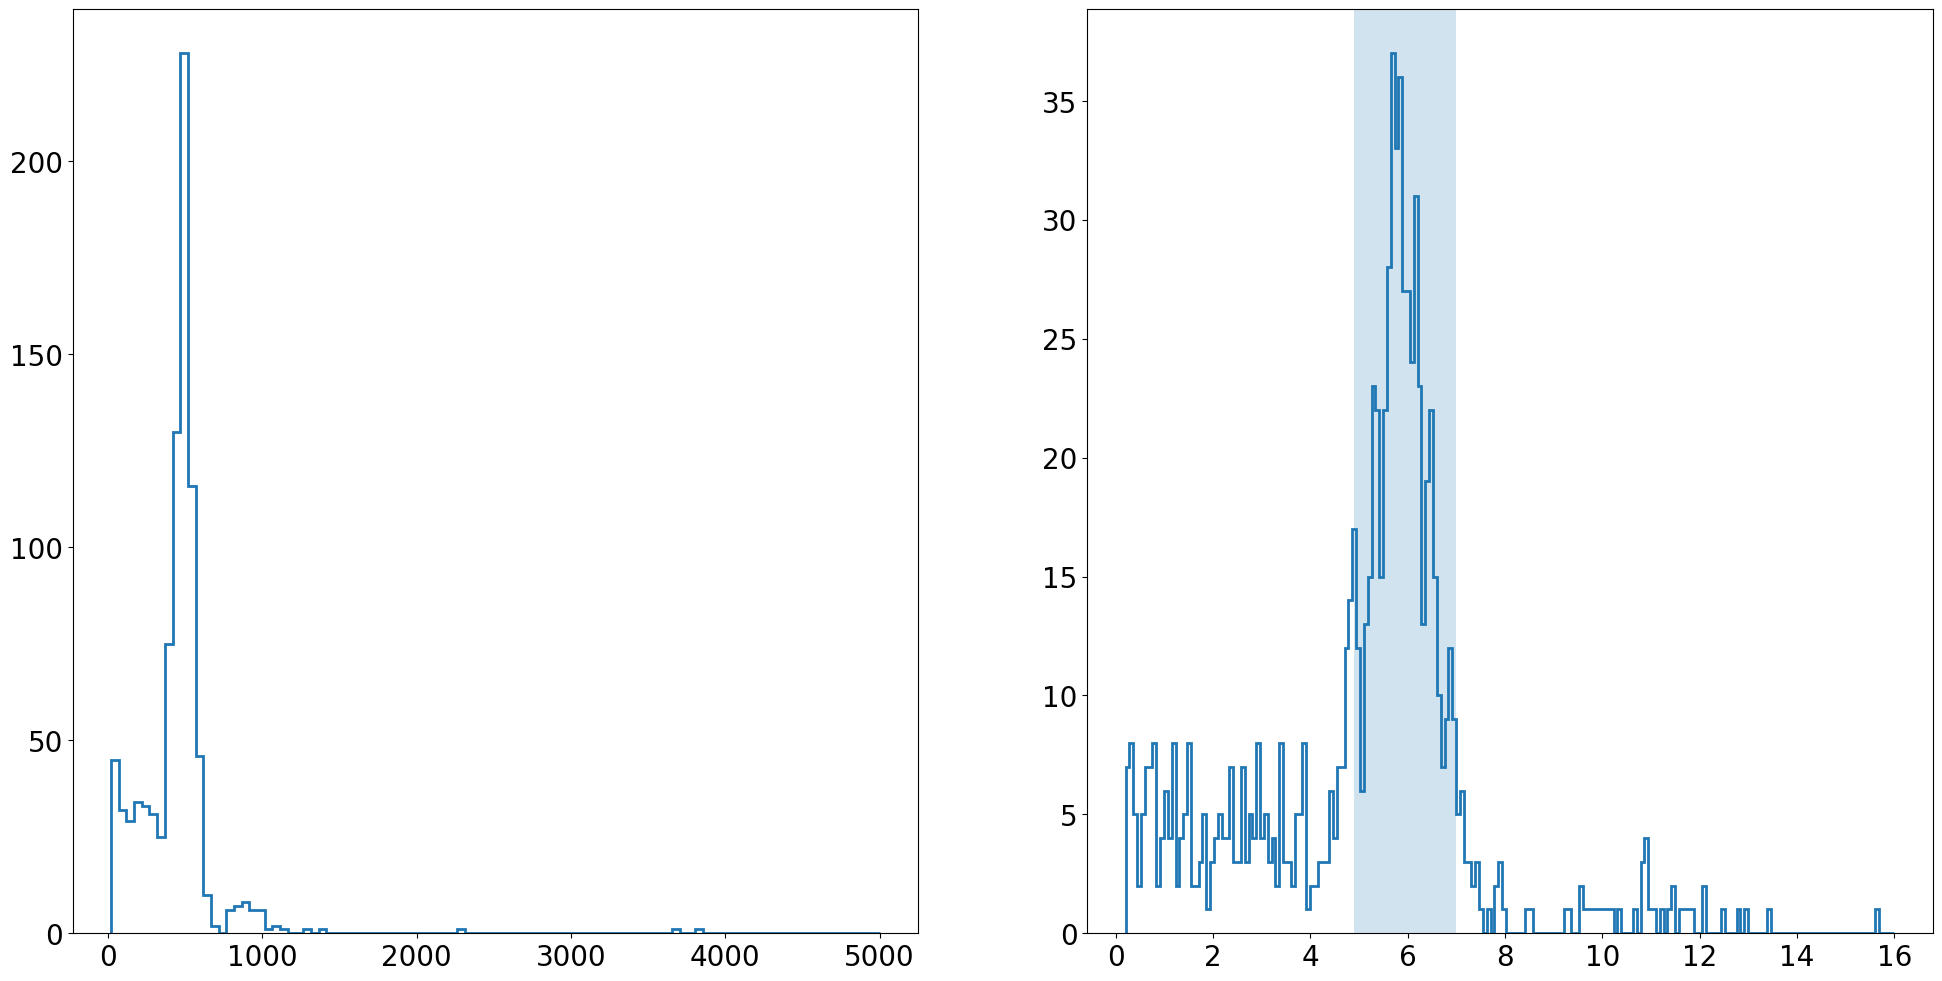

In [119]:
fig, axes = plt.subplots(1, 2, figsize=(24, 12))

enebins = np.linspace(20, 5000, 101)
#enebins = np.linspace(50000, 200000, 201)
enebins_c = np.linspace(0.2,16, 201)
normed = False
var    = 's1_energy'


eref = 5.9


y,x, *_ = axes[0].hist(data_1_s2[var], enebins, histtype='step', 
         lw=2, weights=weights_1_s2/len(data_1_s2) if normed else weights_1_s2);
x = coref.shift_to_bin_centers(x)
escale_1 = x[y.argmax()]/eref
data_1_s2[var+'_kev'] = data_1_s2[var]/escale_1
print(x[y.argmax()])
axes[1].hist(data_1_s2[var+'_kev'], enebins_c, histtype='step', 
         lw=2, weights=weights_1_s2/len(data_1_s2) if normed else weights_1_s2);

erange = [4.9, 7]
#erange = [2.5, 3.5]
axes[1].axvspan(*erange,alpha=0.2)

data_1_s1 = data_1_s1[data_1_s1['file'] == os.path.basename(wf_file)]
data_1_s2 = data_1_s2[data_1_s2['file'] == os.path.basename(wf_file)]

esel  = coref.in_range(data_1_s2[var+'_kev'], *erange)


In [9]:
plt.figure(figsize=(24,8))

sel  = esel
ievt = 1

with tb.open_file(wf_file, 'r') as h5in:
    evts       = np.array([f[0] for f in h5in.root.Run.events[:]])
    evt_number = np.where(data_1_s2[esel].event.values[ievt]==evts)[0][0]
    wvfs    = h5in.root.RD.pmtrwf[evt_number]
    pmt_rwf = -h5in.root.RD.pmtrwf[evt_number].sum(axis=0)#/150#24.75
    #pmt_rwf = -h5in.root.RD.pmtrwf[evt_number][5]#.sum(axis=0)#/150#24.75
#    pmt_rwf = -h5in.root.RD.pmtrwf[evt_number][0]#/24.75
    t = np.linspace(0, len(pmt_rwf)*8/1000, len(pmt_rwf))
    plt.plot(t, pmt_rwf, drawstyle='steps', lw=1.5, zorder=0)
    #plt.plot(t, mau(pmt_rwf ,51), drawstyle='steps', lw=1.5, zorder=0)
    plt.xlabel('Time (µs)')
    plt.ylabel('mV')
    #plt.axhline(0,c='r')
#plt.xlim(0, 40)

NameError: name 'esel' is not defined

<Figure size 2400x800 with 0 Axes>

In [55]:
data_1_s2[esel]#.event.values

,event,timestamp,x,y,r,energy,height,ped_sum,e0,s1_energy,...,ped_sum_pmt5,e0_pmt5,e_pmt6,h_pmt6,e_pmt6_s1,h_pmt6_s1,ped_sum_pmt6,e0_pmt6,file,energy_kev
0,2707649,58013201513,-0.068040,-1.916064,1.917272,1724.412035,4.344593,6.661338e-16,-0.226501,1724.805968,...,-4.683753e-16,-0.008221,98.686630,0.777515,98.697137,0.777515,5.828671e-16,-0.010507,Run_774_file_22_raw.h5,6.488540
1,2707868,58013278568,1.452854,-1.236540,1.907830,1581.007003,5.091282,3.330669e-16,-0.025663,1580.733316,...,3.053113e-16,0.052665,96.742842,1.091673,96.754400,1.091673,9.020562e-17,-0.011558,Run_774_file_22_raw.h5,5.948942
3,2875375,58077468293,2.720563,-2.097386,3.435184,1415.666247,5.544510,-3.039236e-15,-0.179741,1415.497644,...,-5.551115e-16,-0.008221,87.172752,0.772612,87.109360,0.772612,-8.326673e-17,-0.015410,Run_774_file_22_raw.h5,5.326805
4,2875598,58077539774,0.427935,-1.842505,1.891548,1580.186185,5.516846,2.220446e-16,0.440896,1579.865409,...,6.245005e-17,0.103532,100.087558,0.698363,99.940811,0.698363,-1.110223e-16,-0.010857,Run_774_file_22_raw.h5,5.945854
5,2875829,58077621426,0.605285,-0.284975,0.669014,1849.158097,3.925888,-4.440892e-16,0.035830,1849.347257,...,-1.144917e-16,-0.006936,148.997461,1.875142,149.092374,1.875142,-2.498002e-16,0.062692,Run_774_file_22_raw.h5,6.957929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,6628595,8817677143,2.578713,-1.557102,3.012362,1471.728400,5.002503,4.996004e-16,-0.261040,1471.503619,...,2.498002e-16,-0.069364,102.294020,1.328780,102.226075,1.328780,-4.163336e-17,-0.010857,Run_774_file_3_raw.h5,5.537754
995,6628846,8817867933,1.070396,-2.193468,2.440707,1620.780590,4.790714,2.886580e-15,0.080703,1620.846074,...,4.172010e-16,-0.005138,95.105507,1.249628,95.116715,1.249628,-1.665335e-16,0.067595,Run_774_file_3_raw.h5,6.098600
996,6629105,8818001597,0.607104,-1.001380,1.171041,1440.010715,7.962756,-9.992007e-16,0.086517,1439.924198,...,-1.526557e-16,0.050867,141.695123,2.983627,141.705980,2.983627,-1.665335e-16,-0.010857,Run_774_file_3_raw.h5,5.418408
998,6629434,8818140371,2.553107,-0.995031,2.740153,1464.969389,4.048167,0.000000e+00,0.050444,1465.132518,...,-8.326673e-17,-0.010276,105.113388,1.167674,105.127747,1.167674,-5.134781e-16,0.064443,Run_774_file_3_raw.h5,5.512321


In [53]:
evts

array([      0,      46,     162,     221,     330,     340,     455,
           558,     559,     629,     687,     748,     808,     851,
           892,     953,    1023,    1101,    1146,    1251,    1252,
          1308,    1358,    1475,    1534,    1657,    1658,    1730,
          1783,    1849,    1907,    1986,    2046,    2161,    2220,
          2270,    2333,    2424,    2491,    2547,    2643,    2663,
          2743,    2815,    2881,    2948,    2980,    3086,    3148,
          3268,    3327,    3386,    3434,    3444,    3500,    3564,
          3686,    3731,    3771,    3832,    3983,    4061,    4121,
          4165,    4249,    4301,    4361,    4362,    4420,    4504,
          4597,    4642,    4709,    4762,    4819,    4820,    4881,
          4966,    5023,    5066,    5113,    5168,    5223,    5295,
          5349,    5411,    5467,    5520,    5582,    5649,    5716,
          5788,    5909,    5969,    6027,    6088,    6089,    6122,
          6182,    6

In [122]:
checkpath = '/media/ander/Andeeeeee/CoSI simulations/137Cs/Z55A137/CoSI_fromZ55A137_to_Z55A137_crys0_10000events_0_hits.h5'

In [128]:
dst = pd.read_hdf(checkpath, 'HitsLAr')
group = dst.groupby('event_id')
energy = group.energy.sum()
xpos   = group.apply(lambda x : (x.x*x.energy).sum()/x.energy.sum())

In [130]:
energy

event_id
0       0.167958
1       0.081398
10      0.475057
17      0.474021
23      0.520182
          ...   
9975    0.661657
9978    0.148339
9989    0.458067
9994    0.252806
9997    0.445147
Name: energy, Length: 1808, dtype: float32

In [129]:
xpos

event_id
0        -7.795154
1        12.104180
10       74.690536
17       49.019611
23     -108.680061
           ...    
9975    -52.293648
9978    -15.668193
9989    -10.492517
9994    -21.469833
9997    -27.666906
Length: 1808, dtype: float32

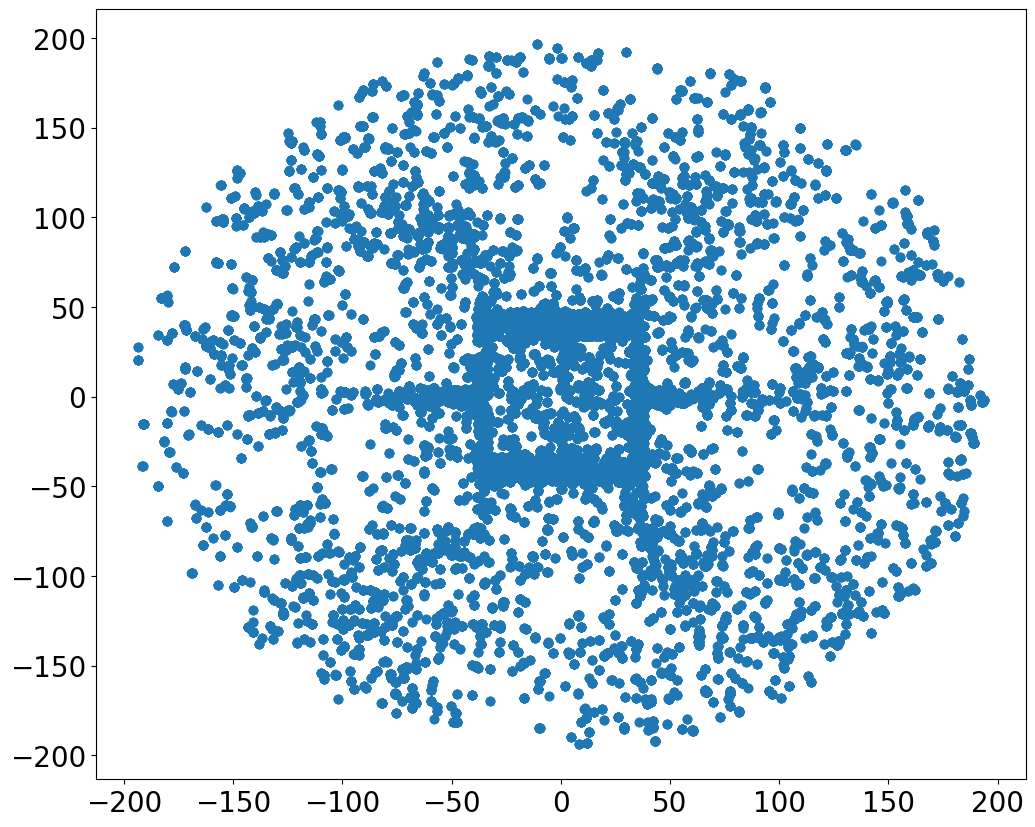

In [133]:
plt.scatter(dst.x, dst.y)

In [134]:
dst2 = pd.read_hdf(checkpath, 'HitsCsI')

(array([10000.,   661.,     0.,   635.,     0.,   666.,   703.,     0.,
          641.,   597.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

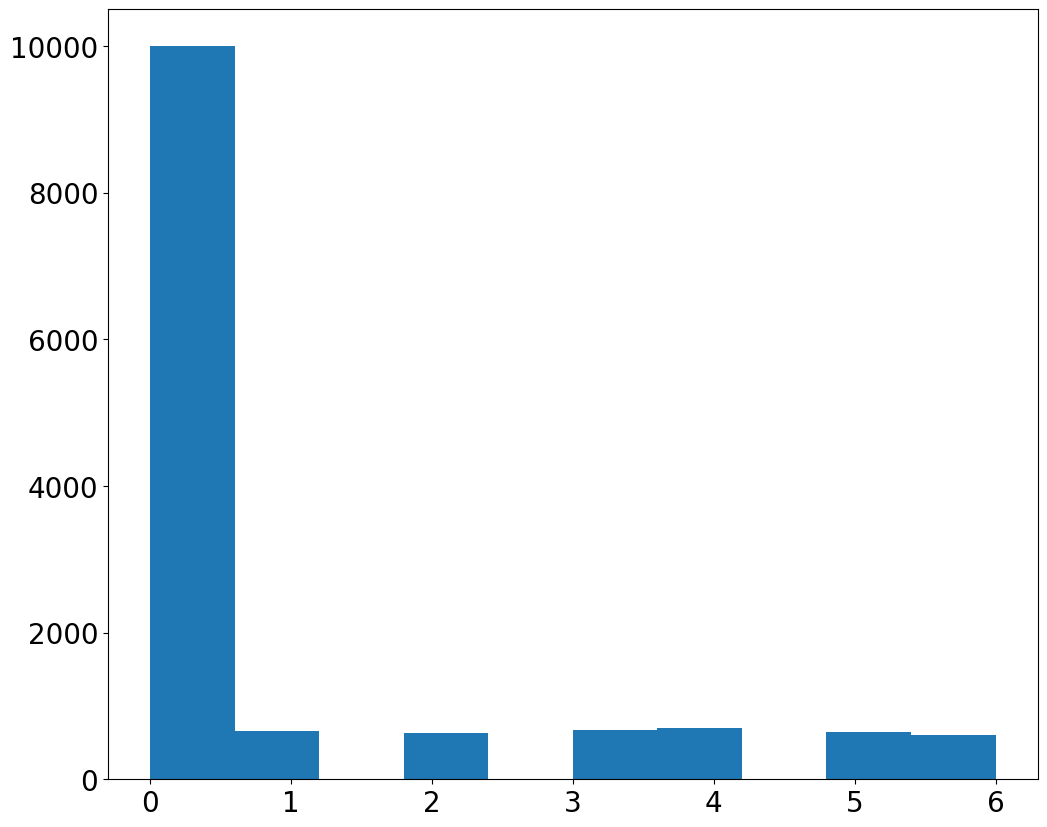

In [135]:
plt.hist(dst2.label)

In [9]:
heat_cap  = 0.520 #kJ/kg K
temp      = 87.302
room_temp = 300
mass      = 50
power     = mass *(room_temp-temp) * heat_cap

In [12]:
power#/(3600*24)

5530.148

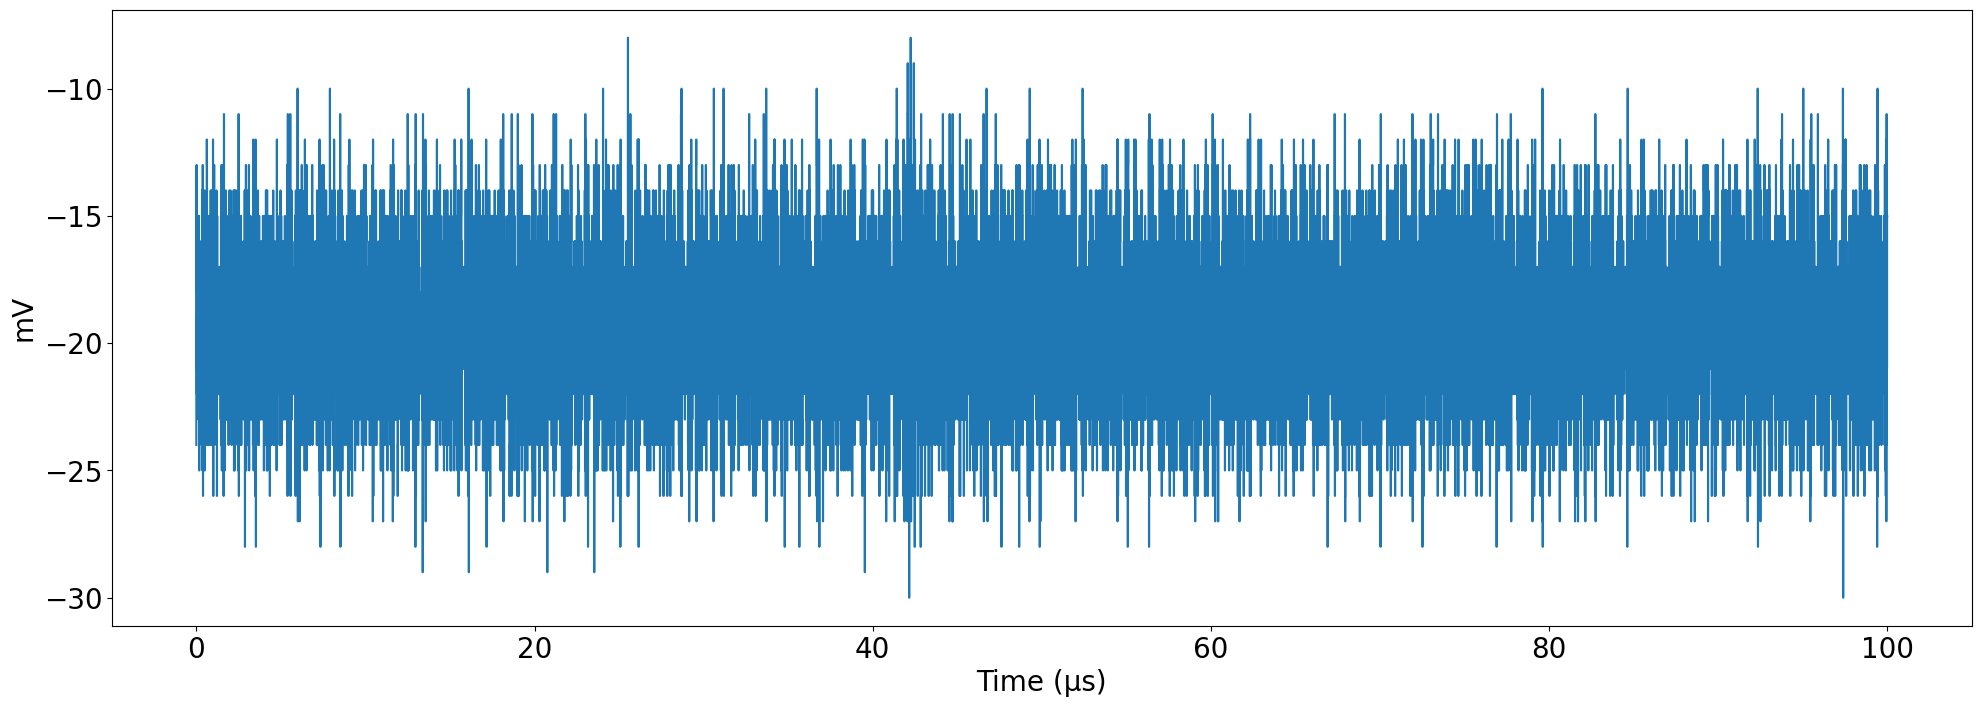

In [16]:
plt.figure(figsize=(24,8))

#sel  = esel
ievt = 1

with tb.open_file(wf_file, 'r') as h5in:
    evts       = np.array([f[0] for f in h5in.root.Run.events[:]])
    evt_number = 0
    wvfs    = h5in.root.RD.pmtrwf[evt_number]
    pmt_rwf = -h5in.root.RD.pmtrwf[evt_number].sum(axis=0)#/150#24.75
    #pmt_rwf = -h5in.root.RD.pmtrwf[evt_number][5]#.sum(axis=0)#/150#24.75
#    pmt_rwf = -h5in.root.RD.pmtrwf[evt_number][0]#/24.75
    t = np.linspace(0, len(pmt_rwf)*8/1000, len(pmt_rwf))
    plt.plot(t, pmt_rwf, drawstyle='steps', lw=1.5, zorder=0)
    #plt.plot(t, mau(pmt_rwf ,51), drawstyle='steps', lw=1.5, zorder=0)
    plt.xlabel('Time (µs)')
    plt.ylabel('mV')
    #plt.axhline(0,c='r')
#plt.xlim(0, 40)

In [17]:
wvfs.shape

(7, 12500)